In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
dir_path = "/content/drive/MyDrive/IOT/SoundClasification/processed_sounds"

In [3]:
import os
import IPython.display as ipd
import numpy as np
import librosa
import librosa.display
import librosa.feature
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
classes = os.listdir(dir_path)
for clas in classes:
  print(clas)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/IOT/SoundClasification/processed_sounds'

In [ ]:
for clas in classes:
  for file in os.listdir(os.path.join(dir_path,clas)):
    print(file)

Streaming output truncated to the last 5000 lines.
noisy_49_basin_2.wav
noisy_50_basin_2.wav
noisy_51_basin_2.wav
noisy_52_basin_2.wav
noisy_53_basin_2.wav
noisy_54_basin_2.wav
noisy_55_basin_2.wav
noisy_56_basin_2.wav
noisy_57_basin_2.wav
noisy_58_basin_2.wav
noisy_59_basin_2.wav
noisy_60_basin_2.wav
noisy_61_basin_2.wav
noisy_62_basin_2.wav
noisy_63_basin_2.wav
noisy_64_basin_2.wav
noisy_65_basin_2.wav
noisy_66_basin_2.wav
noisy_67_basin_2.wav
noisy_68_basin_2.wav
noisy_69_basin_2.wav
noisy_70_basin_2.wav
noisy_71_basin_2.wav
noisy_72_basin_2.wav
noisy_73_basin_2.wav
noisy_74_basin_2.wav
noisy_75_basin_2.wav
noisy_76_basin_2.wav
noisy_77_basin_2.wav
noisy_78_basin_2.wav
noisy_79_basin_2.wav
noisy_80_basin_2.wav
noisy_81_basin_2.wav
noisy_82_basin_2.wav
noisy_83_basin_2.wav
noisy_84_basin_2.wav
noisy_85_basin_2.wav
noisy_86_basin_2.wav
noisy_87_basin_2.wav
noisy_88_basin_2.wav
noisy_89_basin_2.wav
noisy_90_basin_2.wav
noisy_91_basin_2.wav
noisy_92_basin_2.wav
noisy_93_basin_2.wav
nois

In [ ]:
metadata_list = []

for clas in classes:
    class_dir = os.path.join(dir_path, clas)
    for file in os.listdir(class_dir):
        metadata_list.append({'file_path': os.path.join(clas, file), 'class': clas})

metadata = pd.DataFrame(metadata_list)
print(metadata.tail())

metadata.shape


                                    file_path           class
14515  Bathroom flush/noisy_83_bathroom_3.wav  Bathroom flush
14516  Bathroom flush/noisy_84_bathroom_3.wav  Bathroom flush
14517  Bathroom flush/noisy_85_bathroom_3.wav  Bathroom flush
14518  Bathroom flush/noisy_86_bathroom_3.wav  Bathroom flush
14519  Bathroom flush/noisy_87_bathroom_3.wav  Bathroom flush


(14520, 2)

In [ ]:
metadata.to_csv(os.path.join("/content/drive/MyDrive/IOT/SoundClasification", "metadata.csv"), index=False)

In [ ]:
file = os.path.join(dir_path,classes[0],os.listdir(os.path.join(dir_path,classes[0]))[0])
print(file)
ipd.Audio(file)

/content/drive/MyDrive/IOT/SoundClasification/processed_sounds/Single/noisy_88_single_3.wav


Average Amplitude: 0.04819845035672188


<ipython-input-9-4d556d708318>:6: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


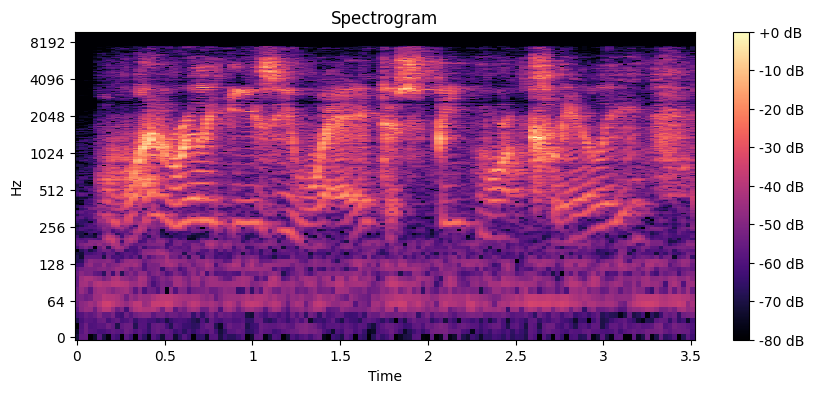

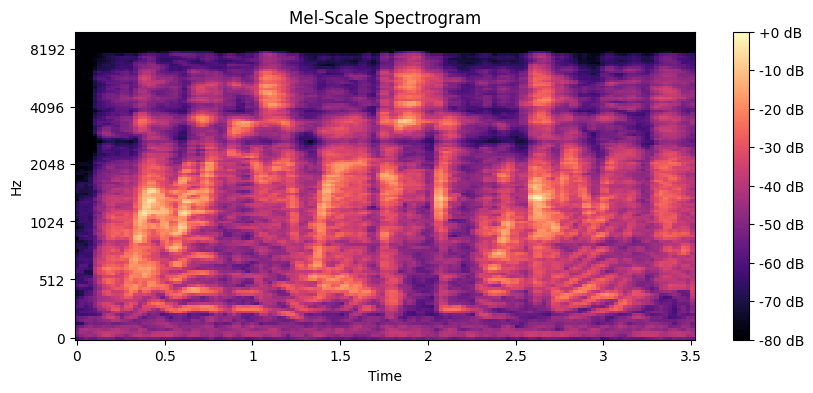

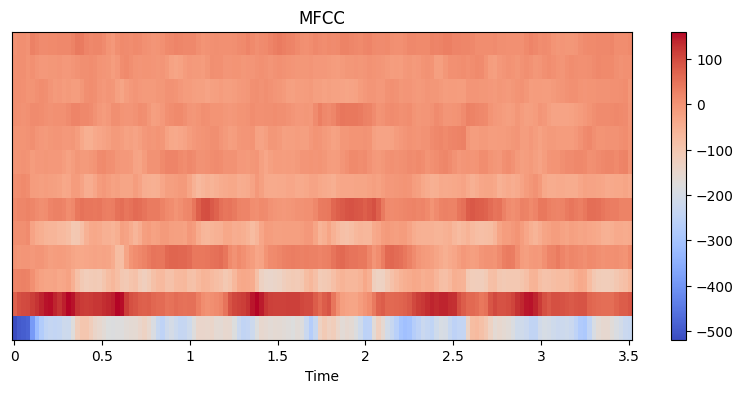

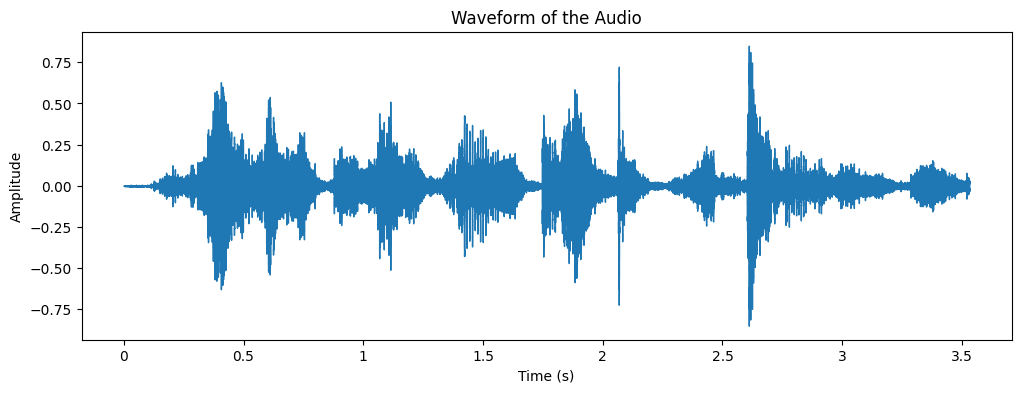

In [ ]:
y, sr = librosa.load(file, sr=None)

avg_amplitude = np.mean(np.abs(y))
print(f"Average Amplitude: {avg_amplitude}")

D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram")
plt.show()

mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spectrogram_db, sr=sr, x_axis="time", y_axis="mel")
plt.colorbar(format="%+2.0f dB")
plt.title("Mel-Scale Spectrogram")
plt.show()

mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis="time")
plt.colorbar()
plt.title("MFCC")
plt.show()

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform of the Audio")
plt.show()
